In [20]:
#loading mnist dataset

import pandas as pd
import matplotlib.pyplot as plt
d0 = pd.read_csv("mnist_train.csv")
#print(d0)
#gives first 5 rows from the table
#print(d0.head(5))
#storing all the labels in l
l = d0['label']
#print(l)
#dropping the label from the d0 and putting all the pixel data in d
d = d0.drop('label', axis = 1)
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


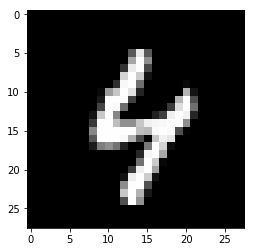

4


In [25]:
#display or plot a number
idx=5555
#grid_data = d.iloc[idx].as_matrix().reshape(28,28)
#use .values instead of .as_matrix() as it will be deprecated in future.
grid_data = d.iloc[idx].values.reshape(28,28)

#to get the values in the index - idx
#print(d.iloc[idx].values)
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html - imshow function
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()

print(l[idx])


In [76]:
#visualizing using PCA
labels = l.head(15000)
data = d.head(15000)

print(labels.shape)
print(data.shape)


(15000,)
(15000, 784)


In [77]:
#data preprocessing - column standardization of data
#inbuilt fucntion StandardScaler preprocesses the data
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)
#print(standardized_data)

C:\Users\SupriyaSecherla\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


(15000, 784)


C:\Users\SupriyaSecherla\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [78]:
#co-variance matrix of standardized_data
import numpy as np
sample_data = standardized_data
#compute covariance matrix
covar_matrix = (np.matmul(sample_data.T, sample_data))
covar_matrix/=15000
#print(covar_matrix)
#print(covar_matrix[456,346])
print(covar_matrix.shape)
print(sample_data.shape)

(784, 784)
(15000, 784)


In [79]:
#compute eigen values and eigen vectors from covariance matrix
from scipy.linalg import eigh
#because eigh returns the values and vectors in ascending order
#783 - 1st principle component
#782 - 2nd principle component
values, vectors = eigh(covar_matrix, eigvals=(782,783))
print(values)
#print(vectors)
print(vectors.shape)


[29.03550386 40.38128612]
(784, 2)


In [87]:
#projecting the data onto the vector
new_sample = np.matmul(sample_data, vectors)
print(new_sample.shape)
#print(new_sample)

(15000, 2)


In [88]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.vstack.html - vstack function
import pandas as pd
new_sample = np.vstack((new_sample.T, labels)).T
print(new_sample)

#creating new data frame for plotting the labelled points
dataframe = pd.DataFrame(data = new_sample, columns = ('2nd_principle', '1st_principle', 'label'))
print(dataframe.head())

[[-5.5586608  -5.04355835  1.        ]
 [ 6.19363477 19.30527806  0.        ]
 [-1.90987794 -7.67877525  1.        ]
 ...
 [-2.14793723 -1.50726893  8.        ]
 [ 3.20412249 -6.53731291  9.        ]
 [-6.87896871 -1.25625388  6.        ]]
   2nd_principle  1st_principle  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


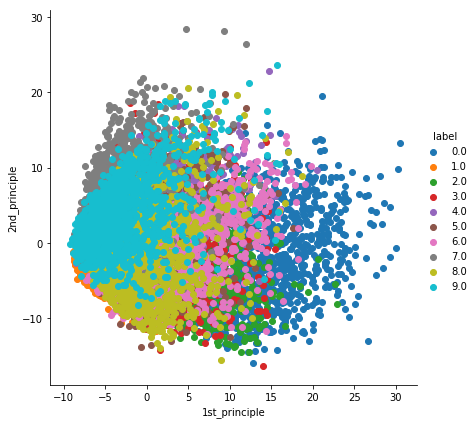

In [89]:
import seaborn as sb
sb.FacetGrid(dataframe, hue = 'label', height = 6).map(plt.scatter, '1st_principle', '2nd_principle').add_legend()
plt.show()

In [92]:
#PCA using scikit learn
from sklearn import decomposition
pca = decomposition.PCA()
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape)

(15000, 2)


(15000, 3)


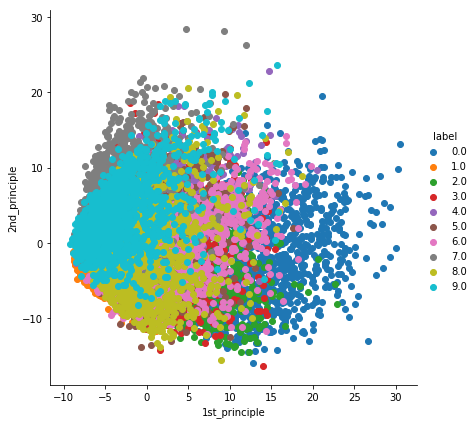

In [94]:
#concatenating the labels to pca_data
new_sample = np.vstack((pca_data.T, labels)).T
print(new_sample.shape)
pca_df = pd.DataFrame(data = new_sample, columns = ('1st_principle', '2nd_principle', 'label'))
sb.FacetGrid(pca_df, hue = 'label', height = 6).map(plt.scatter, '1st_principle', '2nd_principle').add_legend()
plt.show()

(15000, 784)


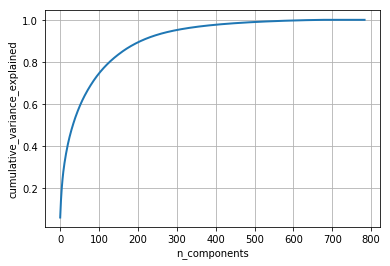

In [103]:
#pca for dimensionality reduction (not for visualization)
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained = np.cumsum(percentage_var_explained)
plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('cumulative_variance_explained')
plt.grid()
plt.show()

In [106]:
#dimensionality reduction using t-SNE 
from sklearn.manifold import TSNE
#using data of 1000 size only as TSNE takes large amount of time to compute
data_1000 = standardized_data[0:1000, :]
labels_1000 = labels[0:1000]
#never forget about passing random_state as TSNE is a stochastical algorithm
model = TSNE(n_components = 2, random_state = 0)
tsne_data = model.fit_transform(data_1000)
print(labels_1000.shape)
print(tsne_data.shape)

(1000,)
(1000, 2)


In [107]:
#append the labels to data
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
print(tsne_data.shape)

(1000, 3)


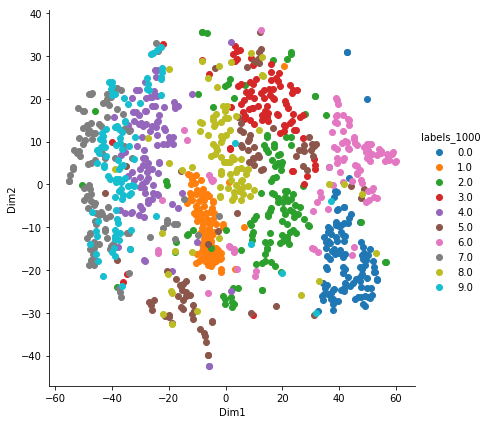

In [111]:
#get the data into a dataframe to plot
tsne_df = pd.DataFrame(data = tsne_data, columns = ('Dim1','Dim2','labels_1000'))
sb.FacetGrid(tsne_df, hue = 'labels_1000', height =6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.show()

In [ ]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, colums = ('Dim1', 'Dim2', 'labels'))
sb.FacetGrid(tsne_df, hue = 'labels', height = 6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title('with perplexity = 50')
plt.show()

In [ ]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50, n_iter = 5000)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T, labels_1000)).T
tsne_df = pd.DataFrame(data = tsne_data, colums = ('Dim1', 'Dim2', 'labels'))
sb.FacetGrid(tsne_df, hue = 'labels', height = 6).map(plt.scatter, 'Dim1', 'Dim2').add_legend()
plt.title('with perplexity = 50, n_iterations = 5000')
plt.show()